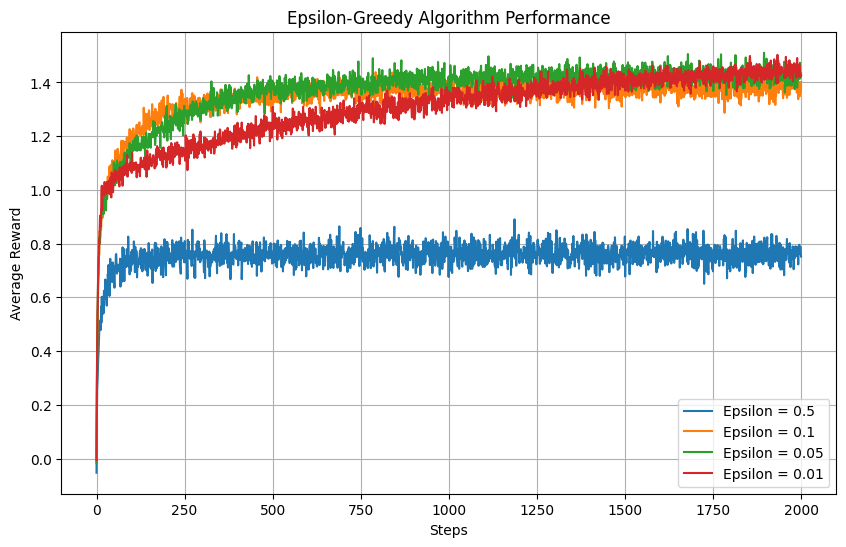

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_bandits = 10                # Number of bandits
num_steps = 2000                # Number of steps per run
num_runs = 2000                 # Number of independent runs
epsilon_values = [0.5, 0.1, 0.05, 0.01]    # Epsilon values to test

# Initialize true action values (stationary bandits)
def initialize_bandits():
    return np.random.normal(0, 1, num_bandits)

# Simulate one run of the epsilon-greedy algorithm
def simulate_epsilon_greedy(epsilon, true_action_values):
    Q_values = np.zeros(num_bandits)    # Estimated action values (initially 0)
    action_counts = np.zeros(num_bandits)  # Number of times each action is taken
    rewards = []

    for step in range(num_steps):
        if np.random.rand() < epsilon:  # Exploration
            action = np.random.randint(num_bandits)
        else:  # Exploitation
            action = np.argmax(Q_values)

        # Generate reward from the selected action's true value
        reward = np.random.normal(true_action_values[action], 1)

        # Update action-value estimates using incremental formula
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]

        rewards.append(reward)

    return rewards

# Main simulation loop
average_rewards = {eps: np.zeros(num_steps) for eps in epsilon_values}

for epsilon in epsilon_values:
    for run in range(num_runs):
        true_action_values = initialize_bandits()  # New bandit problem for each run
        rewards = simulate_epsilon_greedy(epsilon, true_action_values)
        average_rewards[epsilon] += rewards

    # Average over all runs
    average_rewards[epsilon] /= num_runs

# Plot results
plt.figure(figsize=(10, 6))
for epsilon in epsilon_values:
    plt.plot(average_rewards[epsilon], label=f"Epsilon = {epsilon}")

plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Algorithm Performance")
plt.legend()
plt.grid()
plt.show()


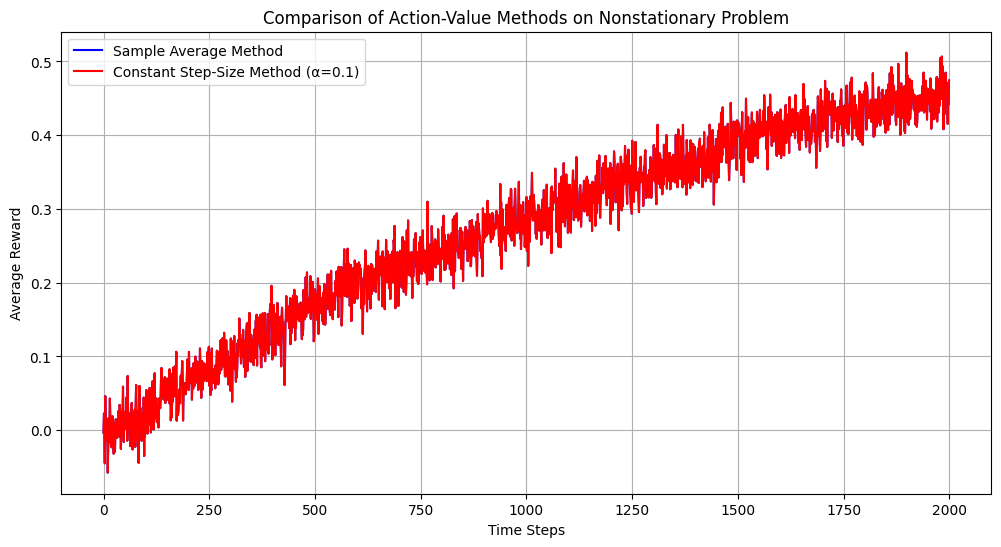

In [16]:
 # Parameters
n_arms = 10
n_steps = 2000
n_runs = 2000
epsilon = 0.1
alpha = 0.5

# Initialize arrays to store average rewards
sample_average_rewards = np.zeros(n_steps)
constant_alpha_rewards = np.zeros(n_steps)

# Simulation
for run in range(n_runs):
    # Initialize true action values (random walk)
    q_star = np.zeros(n_arms)
    # Action value estimates
    sample_average_estimates = np.zeros(n_arms)
    constant_alpha_estimates = np.zeros(n_arms)
    action_counts = np.zeros(n_arms)

    for step in range(n_steps):
        # Update q_star for random walk
        q_star += np.random.normal(0, 0.01, n_arms)

        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(n_arms)
        else:
            action = np.argmax(sample_average_estimates)

        # Simulate reward (assume reward is equal to q_star + noise)
        reward = np.random.normal(q_star[action], 1)

        # Sample average method update
        action_counts[action] += 1
        sample_average_estimates[action] += (reward - sample_average_estimates[action]) / action_counts[action]
        sample_average_rewards[step] += (reward - sample_average_rewards[step]) / (run + 1)

        # Constant alpha method update
        constant_alpha_estimates[action] += alpha * (reward - constant_alpha_estimates[action])
        constant_alpha_rewards[step] += (reward - constant_alpha_rewards[step]) / (run + 1)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(sample_average_rewards, label='Sample Average Method', color='blue')
plt.plot(constant_alpha_rewards, label='Constant Step-Size Method (α=0.1)', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Action-Value Methods on Nonstationary Problem')
plt.legend()
plt.grid()
plt.show()